In [1]:
import torch as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import src as sp
import runtime as rt
from theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [2]:
csv_filepaths = [
    #"results/tem1/TEM-1_alone_Deng_correlations.csv",
    #"results/tem1/TEM-1_Nitrocefin+water_Deng_correlations.csv",
    #"results/tem1/TEM-1_alone_MSA_correlations.csv",
    #"results/tem1/TEM-1_Nitrocefin+water_MSA_correlations.csv",
    "results/tem1/TEM-1_alone_Deng_correlations_v2.csv",
    "results/tem1/TEM-1_Nitrocefin+water_Deng_correlations_v2.csv",
    "results/tem1/TEM-1_alone_MSA_correlations_v2.csv",
    "results/tem1/TEM-1_Nitrocefin+water_MSA_correlations_v2.csv",
    "results/tem1/Deng_MSA_correlations.csv",
]

df_l = [pd.read_csv(fp) for fp in csv_filepaths]

In [3]:
df_l[0]

,residue,position,cor.spearman,cor.kendall,cor.pearson
0,HIS,26,0.414313,0.287250,0.459002
1,PRO,27,0.678156,0.558588,0.663940
2,GLU,28,0.648120,0.463158,0.663235
3,THR,29,0.551205,0.393639,0.658323
4,LEU,30,0.823845,0.648908,0.763518
...,...,...,...,...,...
258,LEU,284,0.640602,0.463158,0.725928
259,ILE,285,0.775019,0.613765,0.817172
260,LYS,286,0.730848,0.541650,0.745300
261,HIS,287,0.454070,0.356840,0.500949


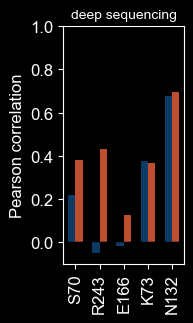

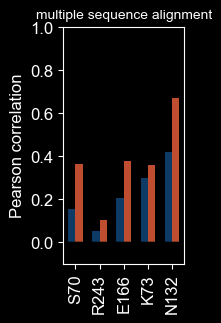

In [4]:
# parameters
resids_sel = [70,73,132,166,243]
ids_ord = [0,4,3,1,2]

# get data
v = np.stack([(df_l[i][df_l[i]['position'].isin(resids_sel)])['cor.pearson'].values for i in range(len(df_l))])
t = np.stack([(df_l[i][df_l[i]['position'].isin(resids_sel)])[['residue', 'position']].values for i in range(len(df_l))])
l = np.array(["{}{}".format(sp.res3to1[rn],ri) for rn,ri in t[0]])
x = np.arange(v.shape[1])

# reorder
v = v[:,ids_ord]
l = l[ids_ord]

# plot
plt.figure(figsize=(1+0.22*v.shape[1],3.4))
plt.bar(x-0.15, v[0], width=0.3, color=colors[1])
plt.bar(x+0.15, v[1], width=0.3, color=colors[0])
plt.plot([-0.5, len(x)-0.5], [0.0, 0.0], 'k-', alpha=0.3)
plt.xticks(x, l, rotation=90)
plt.yticks(np.linspace(-1.0, 1.0, 11), np.round(np.linspace(-1.0, 1.0, 11),1))
plt.ylim(-0.1, 1.0)
plt.xlim(-0.5, len(x)-0.5)
plt.title("deep sequencing", fontsize=10)
plt.ylabel("Pearson correlation")
plt.tight_layout()
plt.savefig("graphs/tem1_seq_deep_seq.svg")
plt.show()

# plot
plt.figure(figsize=(1+0.22*v.shape[1],3.4))
plt.bar(x-0.15, v[2], width=0.3, color=colors[1])
plt.bar(x+0.15, v[3], width=0.3, color=colors[0])
plt.plot([-0.5, len(x)-0.5], [0.0, 0.0], 'k-', alpha=0.3)
plt.xticks(x, l, rotation=90)
plt.yticks(np.linspace(-1.0, 1.0, 11), np.round(np.linspace(-1.0, 1.0, 11),1))
plt.ylim(-0.1, 1.0)
plt.xlim(-0.5, len(x)-0.5)
plt.title("multiple sequence alignment", fontsize=10)
plt.ylabel("Pearson correlation")
plt.tight_layout()
plt.savefig("graphs/tem1_seq_msa.svg")
plt.show()

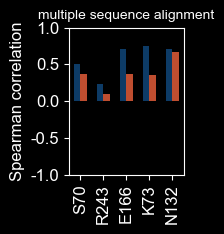

In [5]:
# plot
plt.figure(figsize=(1+0.22*v.shape[1],2.5))
plt.bar(x-0.15, v[4], width=0.3, color=colors[1])
plt.bar(x+0.15, v[3], width=0.3, color=colors[0])
plt.xticks(x, l, rotation=90)
plt.yticks(np.linspace(-1.0, 1.0, 5), np.linspace(-1.0, 1.0, 5))
plt.ylim(-1.0, 1.0)
plt.xlim(-0.5, len(x)-0.5)
plt.title("multiple sequence alignment", fontsize=10)
plt.ylabel("Spearman correlation")
plt.tight_layout()
plt.show()

[0.50601497 0.50911383 0.51305873 0.52059215 0.52106942]


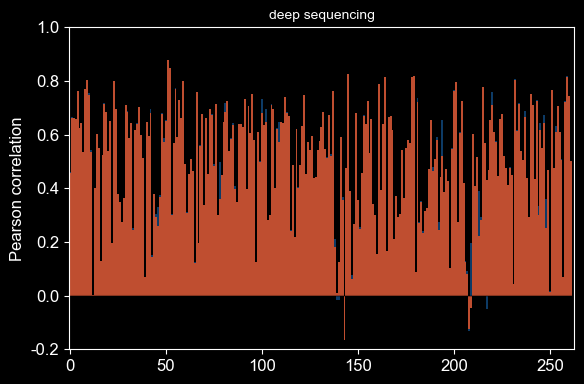

In [6]:
# parameters
resids_sel = [70,73,132,166,243]

# get data
v = np.stack([df_l[i]['cor.pearson'].values for i in range(len(df_l))])
print(np.mean(v, axis=1))
t = np.stack([df_l[i][['residue', 'position']].values for i in range(len(df_l))])
l = np.array(["{}{}".format(sp.res3to1[rn],ri) for rn,ri in t[0]])
x = np.arange(v.shape[1])

ids_resids_sel = np.where(t[0,:,1].astype(int).reshape(-1,1) == np.array(resids_sel).reshape(1,-1))[0]

#dv = v[0] - v[1]
#m = (np.abs(dv) > 1e-2)
#v = v[:,m]
#l = l[m]
#x = np.arange(v.shape[1])

#ids_resids_sel = np.concatenate([ids_resids_sel, np.where(np.abs(dv) > 0.2)[0]])

# plot
plt.figure(figsize=(6,4))
plt.plot([-0.5, len(x)-0.5], [0.0, 0.0], 'k-', alpha=0.3)
#for i in ids_resids_sel:
    #plt.plot([x[i],x[i]], [-1.0,1.0], 'k-', alpha=0.3)
#plt.plot(x, v[0], '-', ms=4.0, color=colors[1])
#plt.plot(x, v[1], '-', ms=4.0, color=colors[0])
plt.bar(x, v[0], width=1.0, color=colors[1])
plt.bar(x, v[1], width=1.0, color=colors[0])
#plt.step(x, v[0], where='mid', color=colors[1], label="without context")
#plt.step(x, v[1], where='mid', color=colors[0], label="with context")

#dv = v[0] - v[1]
#for i in np.where(dv > 0.0)[0]:
#   plt.plot([x[i], x[i]], [v[0][i], v[1][i]], color=colors[1])
#for i in np.where(-dv > 0.0)[0]:
#   plt.plot([x[i], x[i]], [v[0][i], v[1][i]], color=colors[0])

#plt.xticks(x[ids_resids_sel], l[ids_resids_sel], rotation=90)
#plt.xticks(x, l, rotation=90, fontsize=10)
plt.yticks(np.linspace(-1.0, 1.0, 11), np.round(np.linspace(-1.0, 1.0, 11),1))
plt.ylim(-0.2, 1.0)
plt.xlim(-0.5, len(x)-0.5)
#plt.legend(loc='best')
plt.title("deep sequencing", fontsize=10)
plt.ylabel("Pearson correlation")
plt.tight_layout()
#plt.savefig("graphs/tem1_seq_deep_seq.svg")
plt.show()

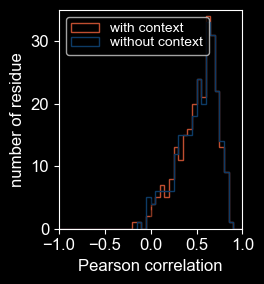

(0.5060149749182881,
 0.509113830311608,
 0.21281812706157024,
 0.2078208026198781)

In [7]:
plt.figure(figsize=(2.8,3))
plt.hist([v[0],v[1]], range=(-1.0,1.0), bins=40, histtype='step', color=[colors[1],colors[0]], label=["without context", "with context"])
plt.plot([0.0, 0.0], [0.0, 35.0], 'k--', alpha=0.3)
plt.xlim(-1.0, 1.0)
plt.ylim(0.0, 35.0)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.legend(loc='upper left', fontsize=10, labelspacing=0.1)
plt.ylabel('number of residue')
plt.xlabel('Pearson correlation')
#plt.title("deep sequencing", fontsize=12)
plt.tight_layout()
plt.savefig("graphs/deep_seq_correlation_distribution.svg")
plt.show()

np.mean(v[0]), np.mean(v[1]), np.std(v[0]), np.std(v[1])

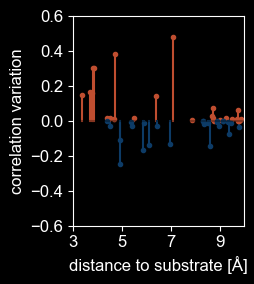

In [8]:
pwc = pt.load("results/tem1/prediction_with_context.pt")
d = pwc['d']
ids_d = np.argsort(d)

ds = d[ids_d]
dvs = v[1][ids_d]-v[0][ids_d]
m0 = (dvs >= 0.0)
m1 = (dvs < 0.0)

# plot
plt.figure(figsize=(2.7,3))
for i in range(dvs.shape[0]):
    if m0[i]:
        plt.plot([ds[i],ds[i]], [0.0,dvs[i]], color=colors[0])
    else:
        plt.plot([ds[i],ds[i]], [0.0,dvs[i]], color=colors[1])
plt.plot(ds[m0], dvs[m0], '.', color=colors[0], label="increase")
plt.plot(ds[m1], dvs[m1], '.', color=colors[1], label="decrease")
plt.plot([0.0, np.max(d)], [0.0,0.0], 'k-', alpha=0.3)
#plt.legend(loc='best', fontsize=10, labelspacing=0.1)
plt.xticks(np.arange(8)[::2]+3, np.arange(8)[::2]+3)
plt.xlim(3.0, 10.0)
plt.ylim(-0.6, 0.6)
plt.xlabel('distance to substrate [Å]')
plt.ylabel('correlation variation')
plt.tight_layout()
plt.savefig("graphs/deep_seq_correlation_variation_distance.svg")
plt.show()

In [ ]:
pd.read_csv("results/tem1/deng_exp.csv", sep='\t', index_col=0)[sp.std_resnames[:20]]

In [ ]:
dg = pd.read_csv("results/tem1/deng_exp.csv", sep='\t', index_col=0)[sp.std_resnames[:20]].values
pwoc = pt.load("results/tem1/prediction_without_context.pt")
pwc = pt.load("results/tem1/prediction_with_context.pt")

p0 = pt.softmax(pt.logit(pwoc['p']), dim=1)
dg0 = -pt.log(p0 / pt.max(p0 * pwoc['y'], dim=1)[0].unsqueeze(1))

p1 = pt.softmax(pt.logit(pwc['p']), dim=1)
dg1 = -pt.log(p1 / pt.max(p1 * pwc['y'], dim=1)[0].unsqueeze(1))

pcc0 = np.array([np.corrcoef(dg0[i].numpy(), dg[i])[0][1] for i in range(dg0.shape[0])])
pcc1 = np.array([np.corrcoef(dg1[i].numpy(), dg[i])[0][1] for i in range(dg1.shape[0])])

rdg = np.argsort(np.argsort(dg, axis=1), axis=1)

rdg0 = pt.argsort(pt.argsort(dg0, dim=1), dim=1)
rdg1 = pt.argsort(pt.argsort(dg1, dim=1), dim=1)

#pdg = pt.softmax(pt.exp(-pt.from_numpy(dg)), dim=1)
pdg = pt.softmax(pt.pow(10, -pt.from_numpy(dg)), dim=1)

In [ ]:
rt.recovery_rate(pwoc['y'], pwoc['p']), rt.recovery_rate(pwc['y'], pwc['p'])

In [ ]:
np.mean(pcc0), np.mean(pcc1)

In [ ]:
plt.figure()
plt.plot(pcc0)
plt.plot(pcc1)
plt.ylim(0.0, 1.0)
plt.show()

In [ ]:
np.std(pcc0), np.std(pcc1)

In [ ]:
plt.figure(figsize=(12,4))
plt.imshow(np.abs(dg - dg0.numpy()).T)
plt.colorbar()
plt.show()

In [ ]:
drdg0 = np.abs(rdg - rdg0.numpy())

plt.figure(figsize=(16,4))
plt.imshow(drdg0.T, cmap='BuGn')
plt.colorbar()
plt.show()

In [ ]:
s = np.zeros(dg.shape)
for i in range(s.shape[0]):
    ids = np.argsort(dg, axis=1)[i]
    ids0 = np.argsort(dg0.numpy(), axis=1)[i]
    v = dg[i][ids] - np.min(dg[i])
    v0 = dg[i][ids0] - np.min(dg[i])
    s[i] = np.abs(v - v0)

In [ ]:
#i = 177
i = 190
#ids = np.argsort(dg[i])
ids = np.arange(dg[i].shape[0])

#ddg = dg[i].reshape(-1,1) - dg[i].reshape(1,-1)
#ddg0 = (dg0[i].reshape(-1,1) - dg0[i].reshape(1,-1)).numpy()
#s = np.mean(np.abs(ddg0 - ddg), axis=1)

plt.figure(figsize=(4,3))
plt.plot(dg[i])
plt.plot(dg0[i].numpy())
#plt.plot(s)
plt.show()

plt.figure(figsize=(4,3))
plt.plot(s[i], '.-')
plt.ylim(0.0, np.max(s[i]))
plt.show()

np.corrcoef(rdg0[i].numpy(), rdg[i])[0][1], pcc0[i], np.mean(s[i])

In [ ]:
np.argsort(dg[i]), np.argsort(dg0[i].numpy())

In [ ]:
ids = np.argsort(dg, axis=1)[i]
ids0 = np.argsort(dg0.numpy(), axis=1)[i]
v = dg[i][ids] - np.min(dg[i])
v0 = dg[i][ids0] - np.min(dg[i])

plt.figure(figsize=(4,3))
plt.plot(v)
plt.plot(v0)
plt.show()

In [ ]:
dg[i][ids]

In [ ]:
plt.figure()
plt.imshow(dg0.T.numpy())
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.imshow(dg.T)
plt.colorbar()
plt.show()